In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-5-MLR\ToyotaCorolla.csv", encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
scaler = StandardScaler()
data=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns, index=df1.index)
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577
...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883
1432,0.031491,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915


In [8]:
model1 = smf.ols('Price~Age_08_04+KM+cc+HP+Doors+Gears+Quarterly_Tax+Weight', data=data).fit() #model fitting
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:30:35   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.467e-17      0.010  -4.57e-15      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
HP                0.1309      0.012     11.241      0.000       0.108       0.154
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hypothesis Testing:

### 1. Significancy of the regression coefficients

#### Hypothesis:
H0 : The regression coefficients are insignificant

H1 : The regression coefficients are significant

In [9]:
model1.pvalues

Intercept         1.000000e+00
Age_08_04        3.354724e-288
KM                7.538439e-57
cc                1.790902e-01
HP                3.757218e-28
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

#### Conclusion:
The p-value for intercept, cc and doors are more than 0.05, hence, we do not reject H0 for these variables and conclude that these regression coefficients are insignificant.

The p-value for all other variables are less than 0.05, hence we reject H0 for these variables and conclude that these regression coefficients are significant.

### 2. Significancy of the model :

H0 : The model is insignificant

H1 : The model is significant

In [10]:
model1.f_pvalue

0.0

#### Conclusion:
The p-value for the F-test to check the significancy of the model is less than 0.05, hence we reject H0 and conclude that the model is significant.

## Validating the Assumptions of the linear model

### 1. Linearity

Indiviadual Comparison 




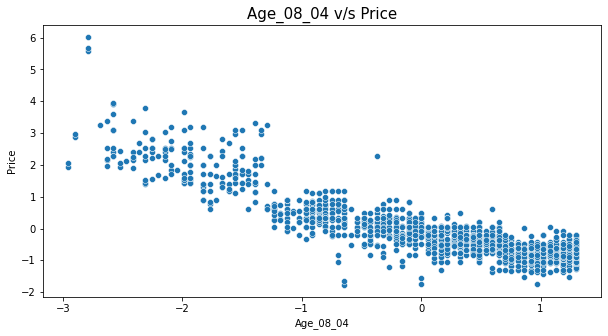

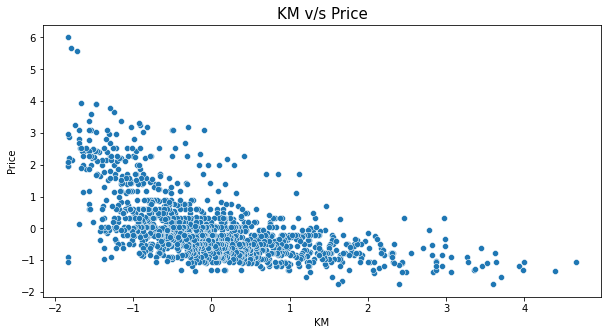

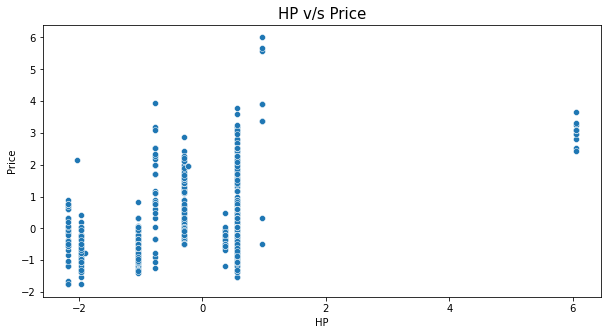

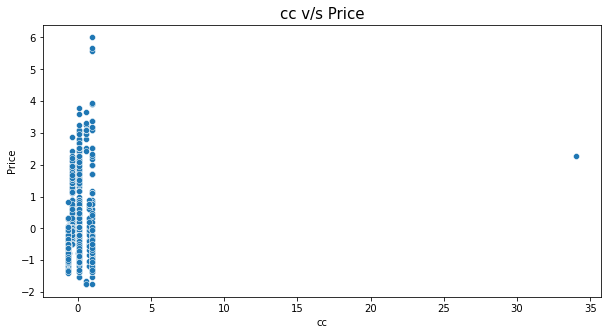

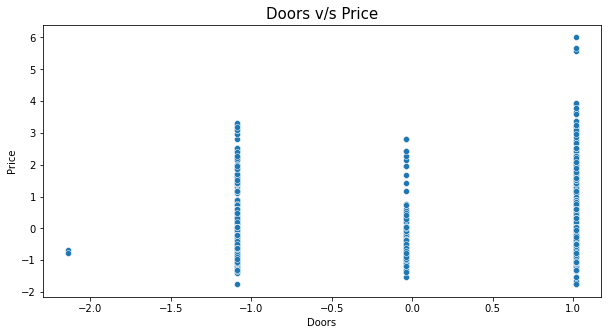

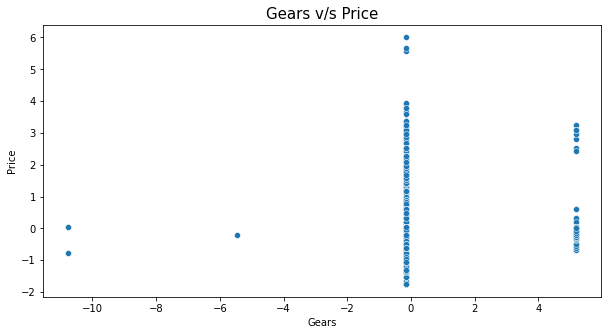

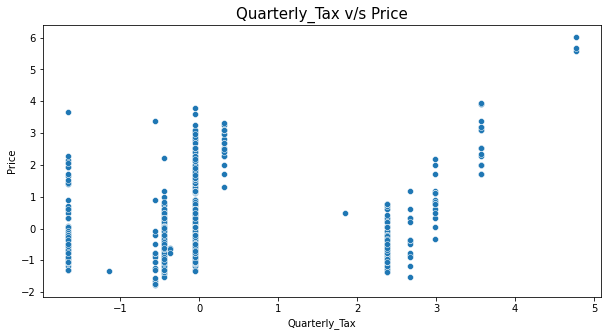

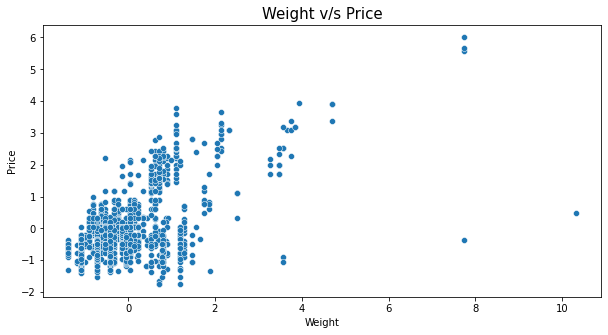

In [11]:
names = data.drop(['Price'], axis=1).columns
print("Indiviadual Comparison \n\n")
for i in names:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data, x=i, y="Price")
    plt.title(label=f'{i} v/s Price', size=15)
    plt.show()

#### Conclusion:
For some variables, the graph shows that there is a kind of linear relationship between the explanatory variables and output variable

### 2. Testing Multicollinearity

#### Using Pair plot

We shall see if there is correlation between the variables, by using pairplot.

In [12]:
# We shall remove the output variable
data1 = data.drop(["Price"], axis=1)

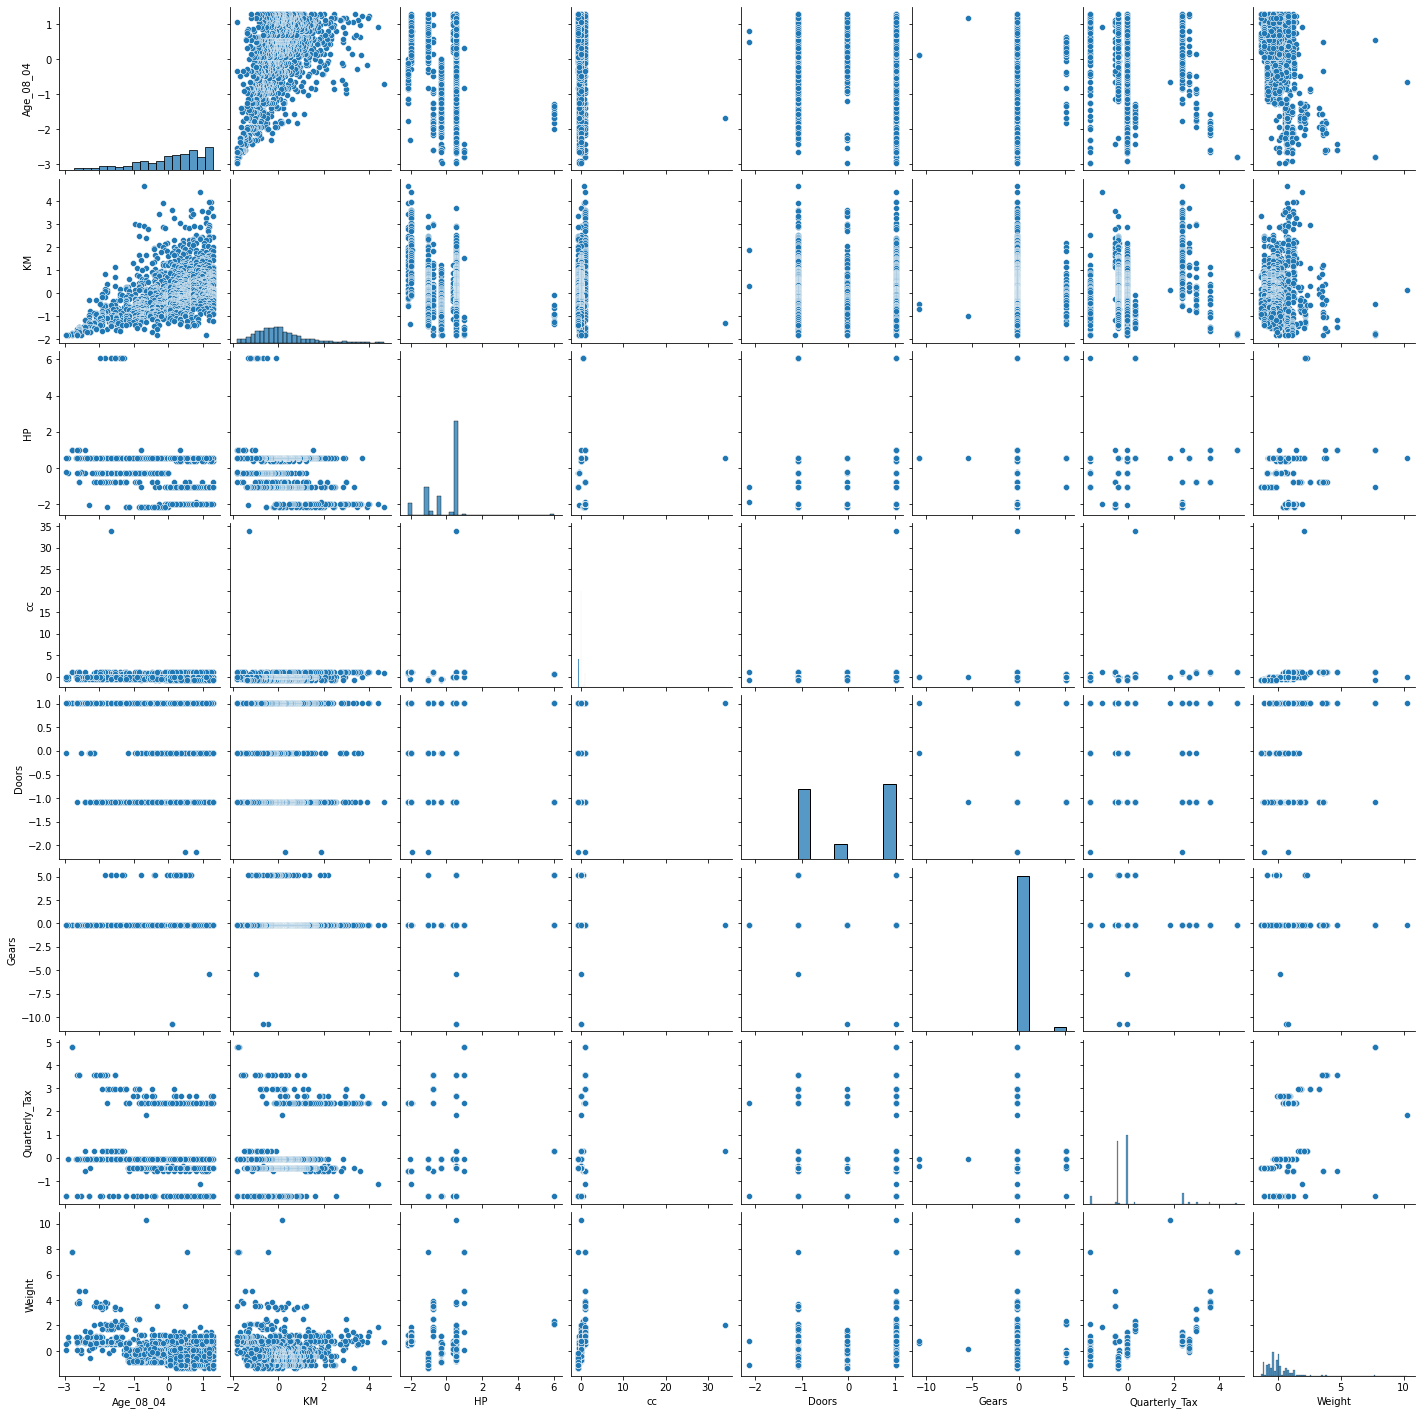

In [13]:
sns.pairplot(data = data1)  

The visualiztion shows that there is little to no correlation between the explanatory variables, but we can also test it by finding the correlations between the variables.

#### Using Correlation

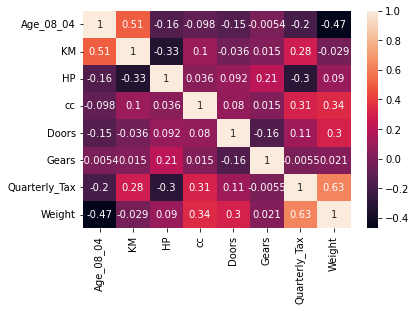

In [14]:
sns.heatmap(data1.corr(), annot=True)
plt.show()

The correlation shows no evidence of collinearity, but to validate the results we shall use VIF.

#### Using Variance Inflation Factor

In [15]:
X = data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor',ascending=False)

,VIF Factor,features
0,7.340136,Price
1,4.741730,Age_08_04
8,2.961102,Weight
7,2.326150,Quarterly_Tax
2,2.097055,KM
3,1.545112,HP
4,1.165368,cc
5,1.156577,Doors
6,1.105727,Gears


#### Conclusion:
Here all the values of VIF are less than 10, hence we shall conclude that all the explanatory variables are independent and there exists no multicollinearity.

### 3. Normality of the errors

#### Using Q-Q Plot

We shall use the Q-Q plot to check if the error terms follow normal distribution or not.

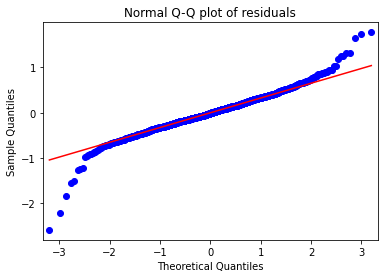

In [16]:
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

Here, majority of the data points lie near the line, and hence we can conclude that the errors follow normal distribution. But to validate our result, we shall use Shapiro-Wilk Test to check the normality of the errors.

#### Performing Kolmogrov-Smirnov Test

##### Hypothesis :

H0 : Error terms are distributed normally

H1 : Error terms are not distributed normally

In [17]:
#for large dataset
# from scipy.stats import shapiro
# shapiro(model1.resid)

In [18]:
kstest(model1.resid, 'norm')

KstestResult(statistic=0.24279478228143858, pvalue=5.239868435737877e-75)

#### Conclusion:
The p-value is less than 0.05, hence reject H0 and conclude that the error terms are not distributed normally.

### 4. Testing Homoscedasticity

#### Using Predicted v/s Residual Plot

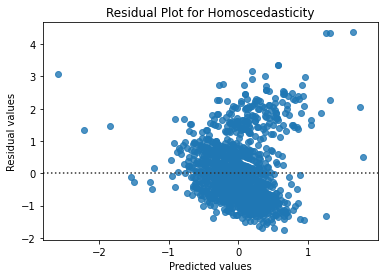

In [19]:
preds = model1.fittedvalues.copy()
true = data["Price"].values.copy()
resid = true-preds
sns.residplot(resid,preds)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

Here the distribution is concentrated, and hence we can say that there does not exist homoscedasticity, but to validate our result, we shall use Breush-Pagan Test.

#### Using Breush-Pagan Test 

##### Hypothesis :

H0 : Homoscedasticity is present

H1 : Homoscedasticity is not present

In [20]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 427.17964175396736),
 ('p-value', 2.8564319642267527e-87),
 ('f-value', 75.5319497421171),
 ('f p-value', 6.336346302324766e-104)]

##### Conclusion :
The p-value for lm test is less than 0.05, hence, we reject H0, and conclude that homoscedasticity is not present. And hence, there exist the problem of hetroscedasticity.

### 5. Testing Autocorrelation

#### Using residual plot

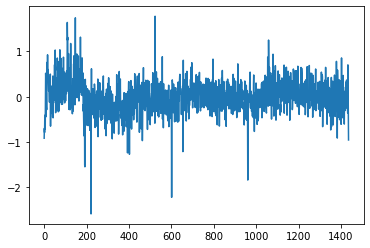

In [21]:
plt.plot(model1.resid.index, model1.resid)

The plot shows that the data points are spread randomly, but some datapoints are concentrated, hence we are not able to conclude anything. Hence we shall use ACF and PACF plots

#### Using ACF and PACF plot

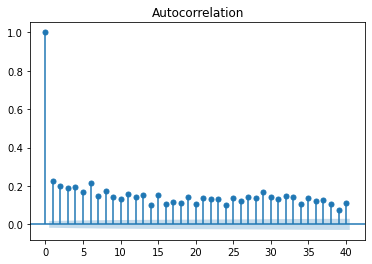

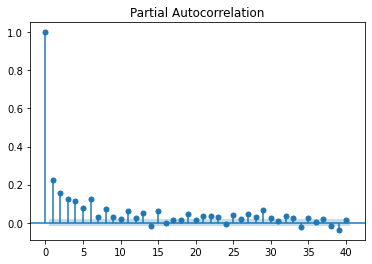

In [22]:
acf = smt.graphics.plot_acf(model1.resid, lags=40, alpha=0.5)
acf.show()
pacf = smt.graphics.plot_pacf(model1.resid, lags=40, alpha=0.5)
pacf.show()

Here, the graph indicates that there exist autocorrelation, because, some points are outside the level of significance. But to validate our result, we shall use Durbin-Watson test.

#### Performing Durbin-Watson Test

The value of test statistic :
* Between 2 and 4 : No autocorrelation
* Less than 2 : Positive Autocorrelarion
* More than 4 : Negative Autocorrelation

##### Hypothesis
H0 : There is no autocorrelation

H1 : There is autocorrelation

In [23]:
durbin_watson(model1.resid)

1.5430469176676886

#### Conclusion:
The value of test statistic is less than 2, hence it can be concluded that there exist positive correlation between the error terms.

### Detecting Influencers/Outliers

In [24]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
print(c)

[7.23682667e-03 3.96793393e-03 5.46476784e-03 ... 8.44762354e-07
 6.97878368e-04 1.08627724e-02]


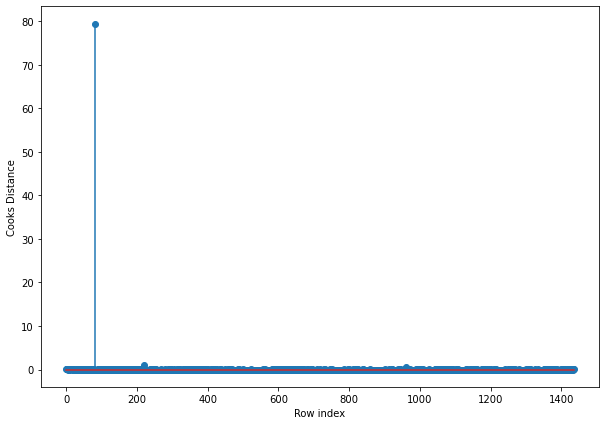

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
k = data.shape[1] # columns
n = data.shape[0] # rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

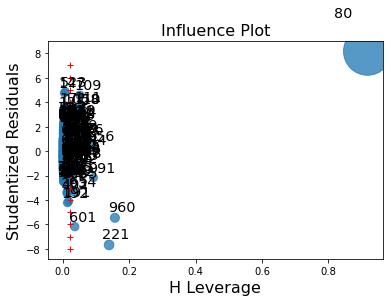

In [27]:
influence_plot(model1,alhpa=0.5)

y=[i for i in range(-8,8)]
x=[leverage_cutoff for i in range(16)]
plt.plot(x,y,'r+')

plt.show()

Here, Very large values are lying outside the line of significancy, which indicates that there are huge number of datapoints, in the datasets that are acting as outliers. But we cannot remove such huge number of datapoints from the data, and hence we cannot do any chnages here.